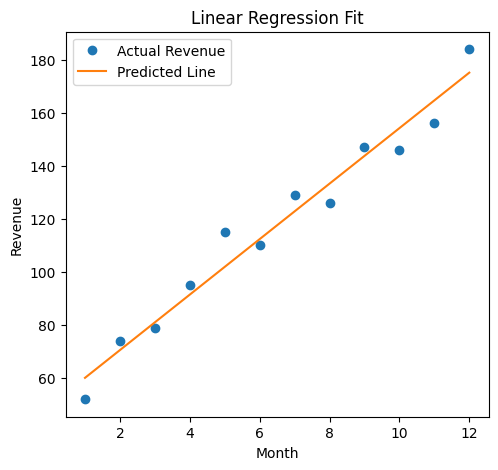

In [ ]:
import matplotlib.pyplot as plt

residuals = []
intercepts = []

def get_gradient_at_b(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -(2/N) * diff  
    return b_gradient

def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        error = y_val - ((m * x_val) + b)
        diff += x_val * error
    m_gradient = -(2/N) * diff 
    return m_gradient

def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

def compute_total_residual(x, y, b, m):
    total = 0
    for i in range(len(x)):
        prediction = m * x[i] + b
        error = y[i] - prediction
        total += error ** 2  
    return total

def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    for _ in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
        
        # Track residual and b
        res = compute_total_residual(x, y, b, m)
        residuals.append(res)
        intercepts.append(b)

    return [b, m]

# Data
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# Run Gradient Descent
b, m = gradient_descent(months, revenue, 0.01, 1000)

#final regression line
y = [m * x + b for x in months]
plt.figure(figsize=(12, 5))

# data and regression line
plt.subplot(1, 2, 1)
plt.plot(months, revenue, "o", label="Actual Revenue")
plt.plot(months, y, label="Predicted Line")
plt.title("Linear Regression Fit")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()


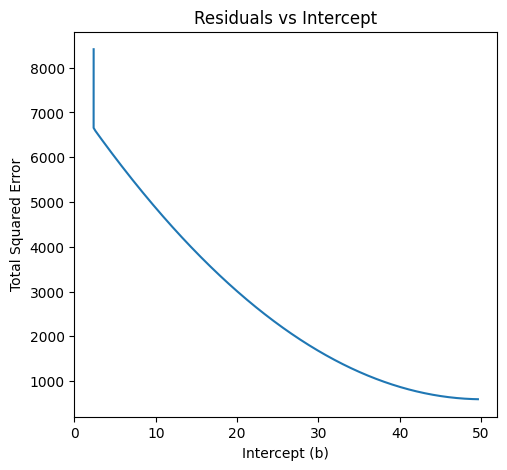

In [8]:
# Plot residuals vs intercept
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(intercepts, residuals)
plt.title("Residuals vs Intercept")
plt.xlabel("Intercept (b)")
plt.ylabel("Total Squared Error")


plt.show()